# Mandelbrot & Julia Set

Daniel Köhn

Kiel, 21.10.2020

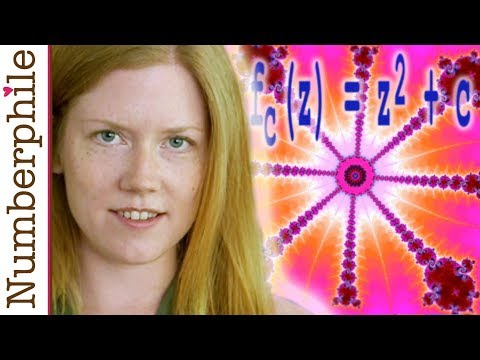

In [20]:
from IPython.display import YouTubeVideo
YouTubeVideo('NGMRB4O922I')

In [21]:
# import libraries
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from numba import jit

In [22]:
# set dpi
#dpiset = 700
dpiset = 100   # use lower resolution in Github repo

## Compute and visualize the Mandelbrot set 

In [23]:
# Define Mandelbrot set
@jit(nopython=True) # use Just-In-Time (JIT) Compilation for C-performance
def mandelbrot(Re,Im,maxit):
    
    z = 0.
    for i in range(maxit):
                
        C = complex(Re,Im)
        z = z**2 + C
        
        if (z.real*z.real + z.imag*z.imag) >= 4:           
            return i
        
    return maxit    

In [24]:
# Create Mandelbrot set
@jit(nopython=True) # use Just-In-Time (JIT) Compilation for C-performance
def create_mandelbrot(width, height, Re_min, Re_max, Im_min, Im_max, maxit, mandel):        

    # define pixel size
    pixel_size_x = (Re_max - Re_min) / width
    pixel_size_y = (Im_max - Im_min) / height

    # estimate which complex numbers are part of the Mandelbrot set
    for i in range(width):
        Re = Re_min + i * pixel_size_x
        for j in range(height):
            Im = Im_min + j * pixel_size_y
    
            mandel[i,j] = mandelbrot(Re,Im,maxit)
        
    return mandel    

dshrink =  50000.00000000001
Wall time: 2.96 s


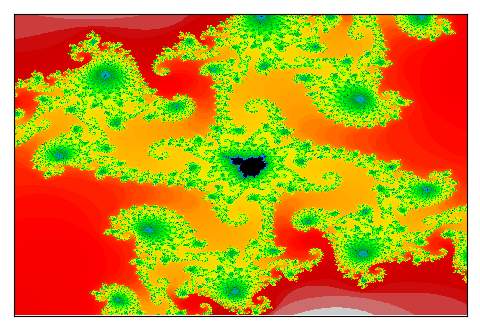

In [25]:
%%time
# Compute Mandelbrot set

# define image size
width = 1536
height = 1024

# define maximum number of iterations
maxit = 3000

# initialize mandelbrot set
mandel = np.zeros([width,height])

# define center of frame
Re_c = -0.743643887037158704752191506114774 
Im_c = 0.131825904205311970493132056385139

# define rate at which the frame shrinks
#shrink = 0.000001
shrink_start = 2.5
shrink_end = 0.00005
nshrink = 1

dshrink = np.exp(np.log(shrink_start / shrink_end) / nshrink)

print('dshrink = ', dshrink)

shrink = shrink_end

plt.figure(dpi=dpiset)

for k in range(nshrink):
    
    # define boundaries of complex plane
    Re_half = 0.5 * shrink
    Im_half = 0.5 * shrink

    Re_min = Re_c - Re_half
    Re_max = Re_c + Re_half

    Im_min = Im_c - Im_half
    Im_max = Im_c + Im_half

    # create Mandelbrot set
    mandel = create_mandelbrot(width, height, Re_min, Re_max, Im_min, Im_max, maxit, mandel)
    
    # Postprocess Mandelbrot Set
    x = (mandel - np.min(mandel)) / (np.max(mandel) - np.min(mandel))
    x = x**(1/3.5)
    x = (np.sin(x * np.pi - np.pi / 2) + 1) / 2

    # Visualize Mandelbrot Set
    plt.imshow(x.T,cmap='nipy_spectral_r')
    plt.xticks([])
    plt.yticks([])
    filename = 'pics/mandelbrot_00' + str(k+1) + '.tiff'
    plt.savefig(filename, format='tiff', bbox_inches='tight',dpi=1000)
    #plt.show()
    
    shrink *= dshrink 

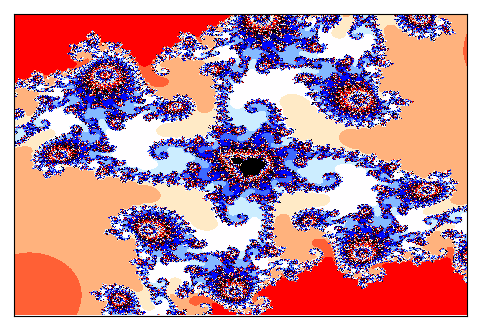

In [26]:
# Visualize Mandelbrot set
plt.figure(dpi=dpiset)
#plt.imshow(mandel.T, cmap='gist_ncar_r', extent = [Re_min,Re_max,Im_min,Im_max])
#plt.imshow(mandel.T, cmap='twilight_r')
plt.imshow(mandel.T, cmap='flag',)
#plt.imshow(mandel.T, cmap='prism')
#plt.imshow(mandel.T, cmap='nipy_spectral_r')
#plt.xlabel('Re')
#plt.ylabel('Im')
plt.xticks([])
plt.yticks([])
plt.savefig('mandelbrot.pdf', format='pdf', bbox_inches='tight')
plt.show()

## Compute Julia Set

In [27]:
# Define Julia set
@jit(nopython=True) # use Just-In-Time (JIT) Compilation for C-performance
def julia_set(Re,Im,Re_C0,Im_C0,maxit):
    
    z = complex(Re,Im)
    C0 = complex(Re_C0,Im_C0)
    for i in range(maxit):
                
        z = z**2 + C0
        
        if(abs(z)>=2.0):
            return i
        
    return maxit    

In [28]:
%%time
# Compute Julia set

# define image size
width = 2000
height = 2000

# define boundaries of complex plane
Re_min1 = -1.5
Re_max1 = 1.5

Im_min1 = -1
Im_max1 = 1

#Re_min1 = -1.5
#Re_max1 = 1.5

#Im_min1 = -1.5
#Im_max1 = 1.5

# define maximum number of iterations
maxit = 700

# define complex point for which the Julia set should be computed
#Re_C0 = -0.512511498387847167
#Im_C0 = 0.521295573094847167

Re_C0 = -0.6
Im_C0 = 0.6

#Re_C0 = -0.8
#Im_C0 = 0.156

#Re_C0 = 0.285
#Im_C0 = 0.01

# initialize mandelbrot set
julia = np.zeros([width,height])

# define complex number plane
Re1 = np.linspace(Re_min1, Re_max1, width)
Im1 = np.linspace(Im_min1, Im_max1, height)

# estimate which complex numbers are part of the Julia set
for i in range(width):
    for j in range(height):
    
        julia[i,j] = julia_set(Re1[i],Im1[j],Re_C0,Im_C0,maxit)

Wall time: 3.06 s


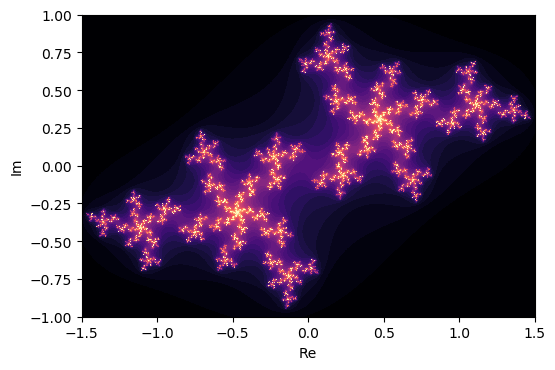

In [29]:
# Visualize Julia set
plt.figure(dpi=dpiset)
plt.imshow(julia.T, cmap='magma', extent = [Re_min1,Re_max1,Im_min1,Im_max1],vmin=1,vmax=40)
plt.xlabel('Re')
plt.ylabel('Im')
plt.savefig('julia.pdf', format='pdf', bbox_inches='tight')